# Progetto di Machine Learning

## Authors
 - Metelli Claudio
 - Cherubini Mattia
 - Bernocchi Alessandro

## Dataset

Detect smoke with the help of IOT data and trigger a fire alarm, using [Smoke detection](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset) dataset.

# Imports

In [50]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Loading Dataset

Come prima cosa importiamo il dataset e stampiamo alcune righe; analizziamo poi il dataset, notando i tipi di ogni colonna ed alcune informazioni ad essa relative. 

In [51]:
dataset = pd.read_csv("smoke_detection_iot.csv")
dataset.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [52]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62630.0,3.131450e+04,18079.868017,0.000000e+00,1.565725e+04,3.131450e+04,4.697175e+04,6.262900e+04
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [54]:
zeros = dataset["Fire Alarm"].value_counts()[0]
ones = dataset["Fire Alarm"].value_counts()[1]
print(
f"""'Fire Alarm' set as 'not active' rows: {zeros}
'Fire Alarm' set as 'active' rows: {ones}
'Total': {zeros + ones}
'Not Active':{np.round(zeros / (zeros + ones) * 100, 2)}%
'Active': {np.round(ones / (zeros + ones) * 100, 2)}%"""
)

'Fire Alarm' set as 'not active' rows: 17873
'Fire Alarm' set as 'active' rows: 44757
'Total': 62630
'Not Active':28.54%
'Active': 71.46%


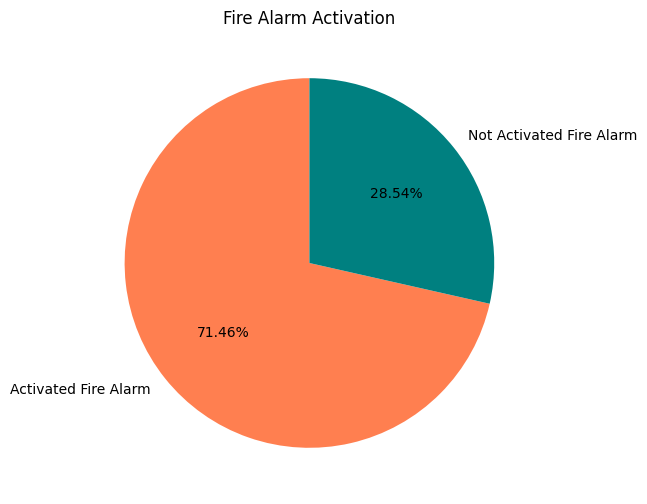

In [55]:
counts = dataset["Fire Alarm"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=["Activated Fire Alarm", "Not Activated Fire Alarm"], autopct='%1.2f%%', startangle=90, colors=["coral", "teal"])
plt.title("Fire Alarm Activation")
plt.show()

# Data Pre-Processing

Innanzittutto rinominiamo la colonna "Unnamed: 0" con il nome "Id", ovvero Id della misurazione rilevata:

In [56]:
dataset = dataset.rename(columns={"Unnamed: 0": "Id"})

Verifichiamo poi la presenza di duplicati:

In [57]:
f"Duplicated values: {dataset.shape[0] - dataset.duplicated().value_counts()[False]}"

'Duplicated values: 0'

Eliminiamo poi colonne non necessarie all'apprendiamento, ovvero la neo-colonna "Id", "UTC", ovvero il timestamp, ed il counter "CNT".

In [58]:
dataset.drop(columns=["Id", "UTC", "CNT"], inplace=True)

## Outliers

Ora vediamo la distribuzione, attraverso istogramma, dei valori per ogni feature del dataset, escludendo "Fire Alarm".<br>Attraverso una visualizzazione grafica cerchiamo la eventuale presenza di outliers:

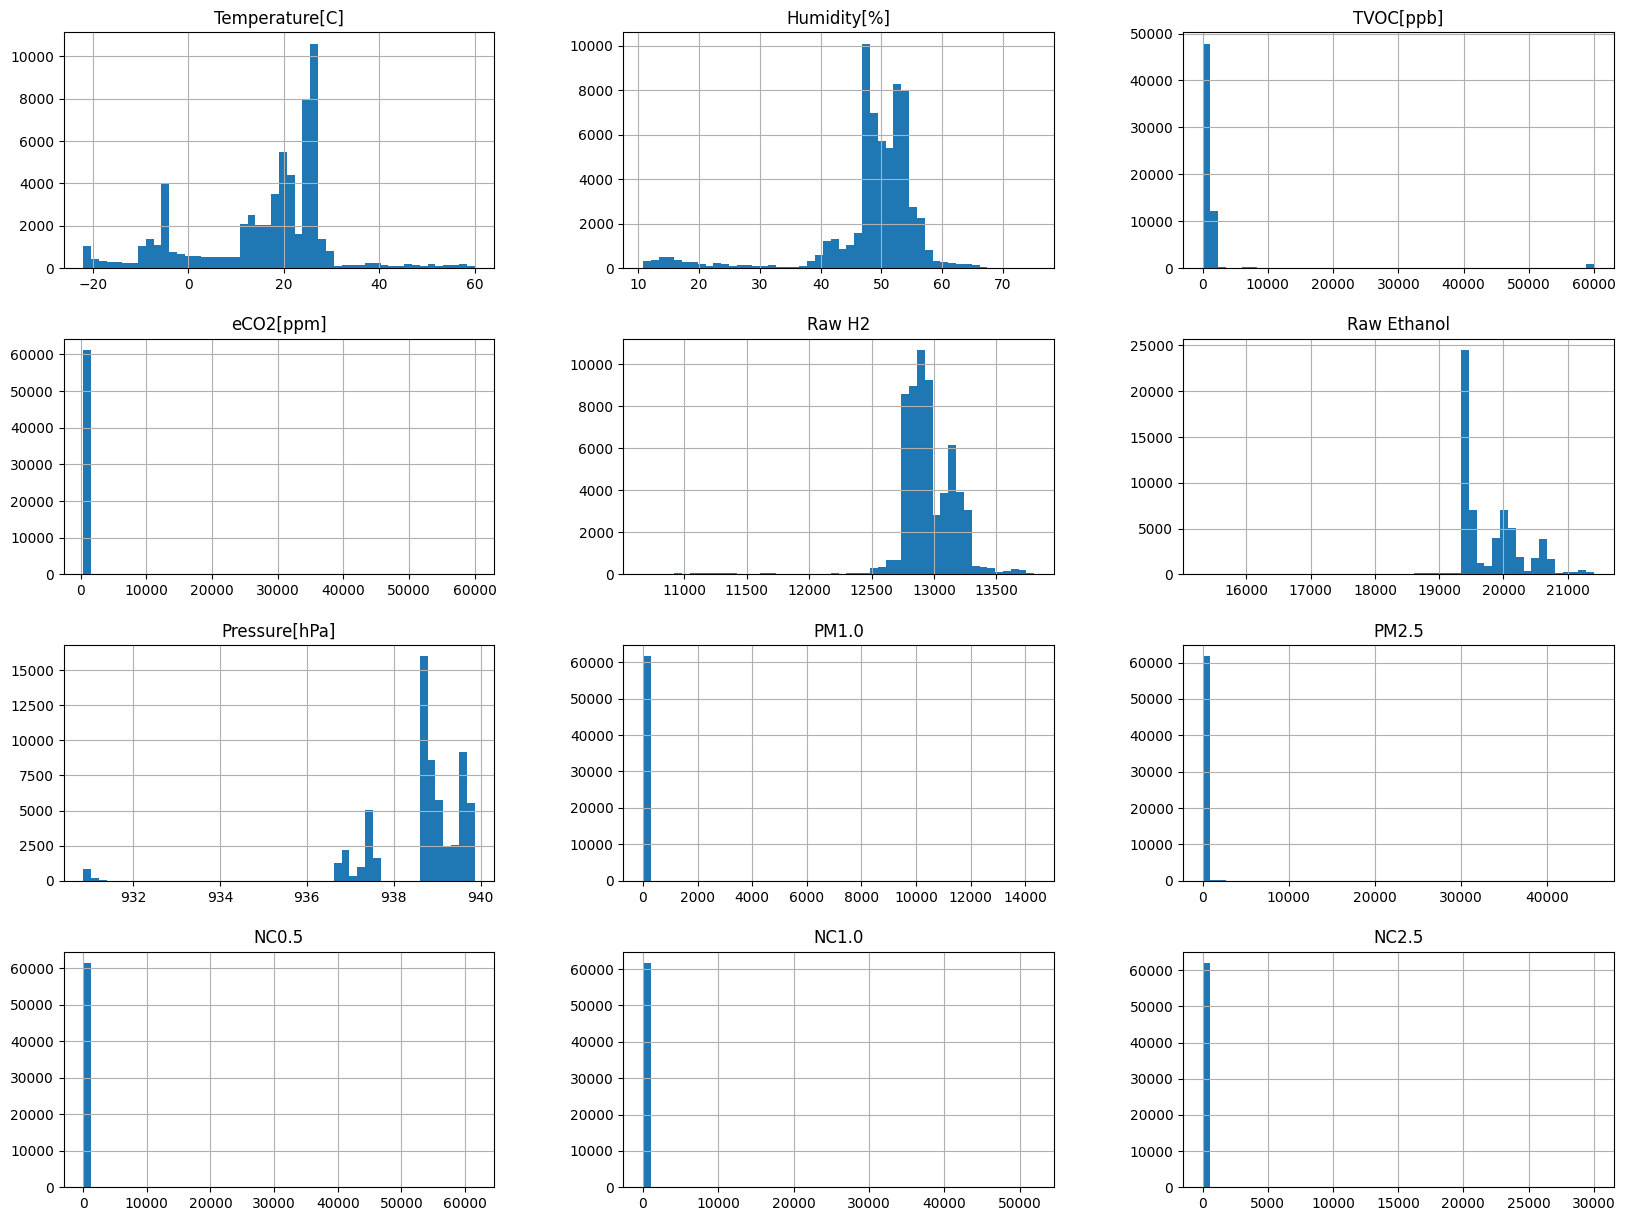

In [59]:
dataset.drop(["Fire Alarm"], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

Notiamo che le possibili colonne con outlier sono: "TVOC[ppb]", "eCO2[ppm]", "Pressure[hPa]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5", in quanto le misurazioni sono maggiormente concentrate in specifici intervalli di valori

In [60]:
outliers_columns = ["TVOC[ppb]", "eCO2[ppm]", "Pressure[hPa]","PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5"]

Ci chiediamo ora, non essendo esperti del dominio, se in effetti tali valori siano effettivamente outlier, dovuti ad esempio a sbagli nella misurazione da parte del sensore, o se essi siano effettivamente valori che assumono valori particolarmente alti o particolarmente bassi a seconda. Per la rilevazione degli outlier useremo lo **z-score**.

### Valutazione ed Eliminazione con **z-score**

Lo z-score misura la distanza di un valore dalla media in unità di deviazione standard.

Dato un valore $x$, una media $\mu$, ed una deviazione standard $\sigma$, si ha:

$z = \frac{x - \mu}{\sigma}$

Dato un valore positivo $n$, si stabilisce che un valore $|z|>n$ è considerato outlier; nel nostro caso $n=3$.

Calcoliamo lo z-score per ogni colonna con possibili outlier nel dataset.

In [61]:
from scipy.stats import zscore

def delete_outliers_z(data, column, threshold = 3):
    remaining_data = data[np.abs(zscore(data[column])) < threshold]
    data.loc[np.abs(zscore(data[column])) > threshold, ("Deleted")] = column
    outliers = data[np.abs(zscore(data[column])) > threshold]
    return remaining_data, outliers

In [62]:
dataset_z_score = dataset.copy()
outliers = pd.DataFrame()

for column in outliers_columns:
    dataset_z_score, out = delete_outliers_z(dataset_z_score, column)
    outliers = pd.concat([outliers, out])
    print(f"Column: {column.ljust(15)} - Found Outliers: {str(out.shape[0]).ljust(7)} - Total Outliers: {outliers.shape[0]}")

Column: TVOC[ppb]       - Found Outliers: 1270    - Total Outliers: 1270
Column: eCO2[ppm]       - Found Outliers: 340     - Total Outliers: 1610
Column: Pressure[hPa]   - Found Outliers: 814     - Total Outliers: 2424
Column: PM1.0           - Found Outliers: 66      - Total Outliers: 2490
Column: PM2.5           - Found Outliers: 32      - Total Outliers: 2522
Column: NC0.5           - Found Outliers: 0       - Total Outliers: 2522
Column: NC1.0           - Found Outliers: 8       - Total Outliers: 2530
Column: NC2.5           - Found Outliers: 152     - Total Outliers: 2682


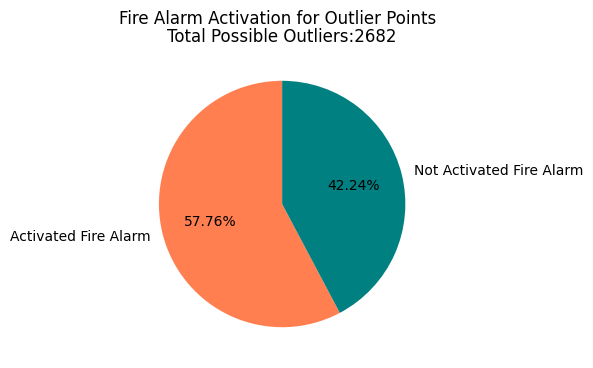

In [63]:
counts = outliers["Fire Alarm"].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=["Activated Fire Alarm", "Not Activated Fire Alarm"], autopct='%1.2f%%', startangle=90, colors=["coral", "teal"])
plt.suptitle("Fire Alarm Activation for Outlier Points")
plt.title(f"Total Possible Outliers:{outliers.shape[0]}")
plt.show()

Osserviamo che, in generale, i possibili outlier non si limitano a identificare semplicemente i punti di attivazione degli allarmi.

Le anomalie sono state riscontrate in quasi tutte le colonne. Procediamo quindi ad analizzare, colonna per colonna, se esistono relazioni significative tra di esse.

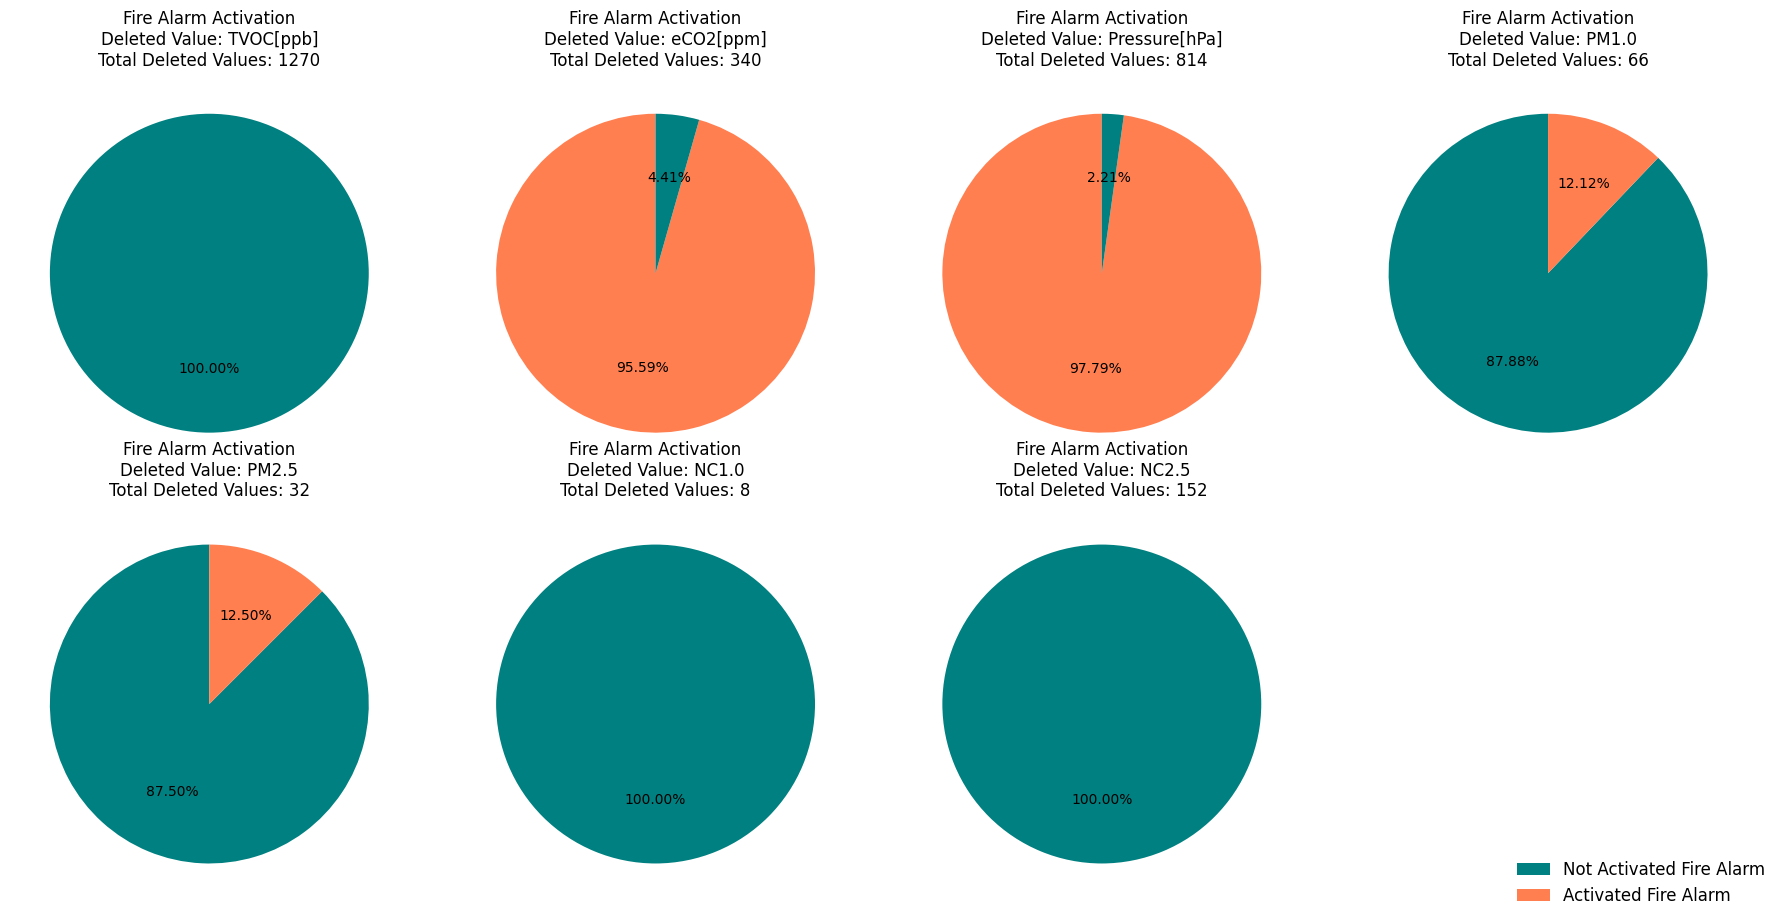

In [64]:
unique_deleted_values = outliers["Deleted"].unique()

fig, axs = plt.subplots(2, 4, figsize=(18, 10))
axs = axs.flatten()

labels = ["Not Activated Fire Alarm", "Activated Fire Alarm"]
color_map = {0: "teal", 1: "coral"}

for i, value in enumerate(unique_deleted_values):
    subset = outliers[outliers["Deleted"] == value]
    counts = subset["Fire Alarm"].value_counts()
    if len(counts) == 1:
        single_value = counts.index[0]
        pie_colors = [color_map[single_value]]
        pie_labels = [labels[single_value]]
    else:
        pie_colors = [color_map[val] for val in counts.index]
        pie_labels = [labels[val] for val in counts.index]
    axs[i].pie(counts, autopct='%1.2f%%', startangle=90, colors=pie_colors)
    axs[i].set_title(f"Fire Alarm Activation\nDeleted Value: {value}\nTotal Deleted Values: {subset.shape[0]}")

for j in range(i + 1, len(axs)):
    axs[j].axis("off")

fig.legend(labels, loc="lower right", ncol=1, frameon=False, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

Risulta evidente come a questo punto, sia probabile che questi punti non siano outliers, bensì veri e propri indicatori di un possibile allarme.
Ad esempio, per quanto riguarda la pressione, notiamo che i valori bassi che potevano essere identificati come outliers, in realtà hanno una forte correlazione con l'attivazione dell'allarme.
Tale esempio è applicabile anche ai restanti campi. Decidiamo dunque di esplorare la correlazione tra i vari attributi e lo scattare dell'allarme.

## Correlazione tra i dati

In [65]:
def show_fire_alarm_activation_plot(data, column, log_scale=False):

    fire_alarm_0 = data[data["Fire Alarm"] == 0][column]
    fire_alarm_1 = data[data["Fire Alarm"] == 1][column]
    
    bins = np.histogram_bin_edges(data[column], bins=30)
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    axs[0].hist(fire_alarm_0, bins=bins, alpha=0.7, label="Not Activated Fire Alarm", color="teal", edgecolor="black")
    axs[0].hist(fire_alarm_1, bins=bins, alpha=0.7, label="Activated Fire Alarm", color="coral", edgecolor="black")
    axs[0].set_title(f"{column} Values over Fire Alarm Activation")
    axs[0].set_ylabel("Total Fire Alarm Activations")
    axs[0].legend()
    axs[0].grid(axis="y", linestyle="--", alpha=0.7)

    axs[1].hist(fire_alarm_0, bins=bins, alpha=0.7, label="Not Activated Fire Alarm", color="teal", edgecolor="black")
    axs[1].set_title(f"{column} Values over not Activated Fire Alarm")
    axs[1].legend()
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    axs[2].hist(fire_alarm_1, bins=bins, alpha=0.7, label="Activated Fire Alarm", color="coral", edgecolor="black")
    axs[2].set_title(f"{column} Values over Activated Fire Alarm")
    axs[2].legend()
    axs[2].grid(axis="y", linestyle="--", alpha=0.7)

    if log_scale:
        for ax in axs:
            ax.set_yscale("log")

    plt.tight_layout()
    plt.show()

### Temperatura

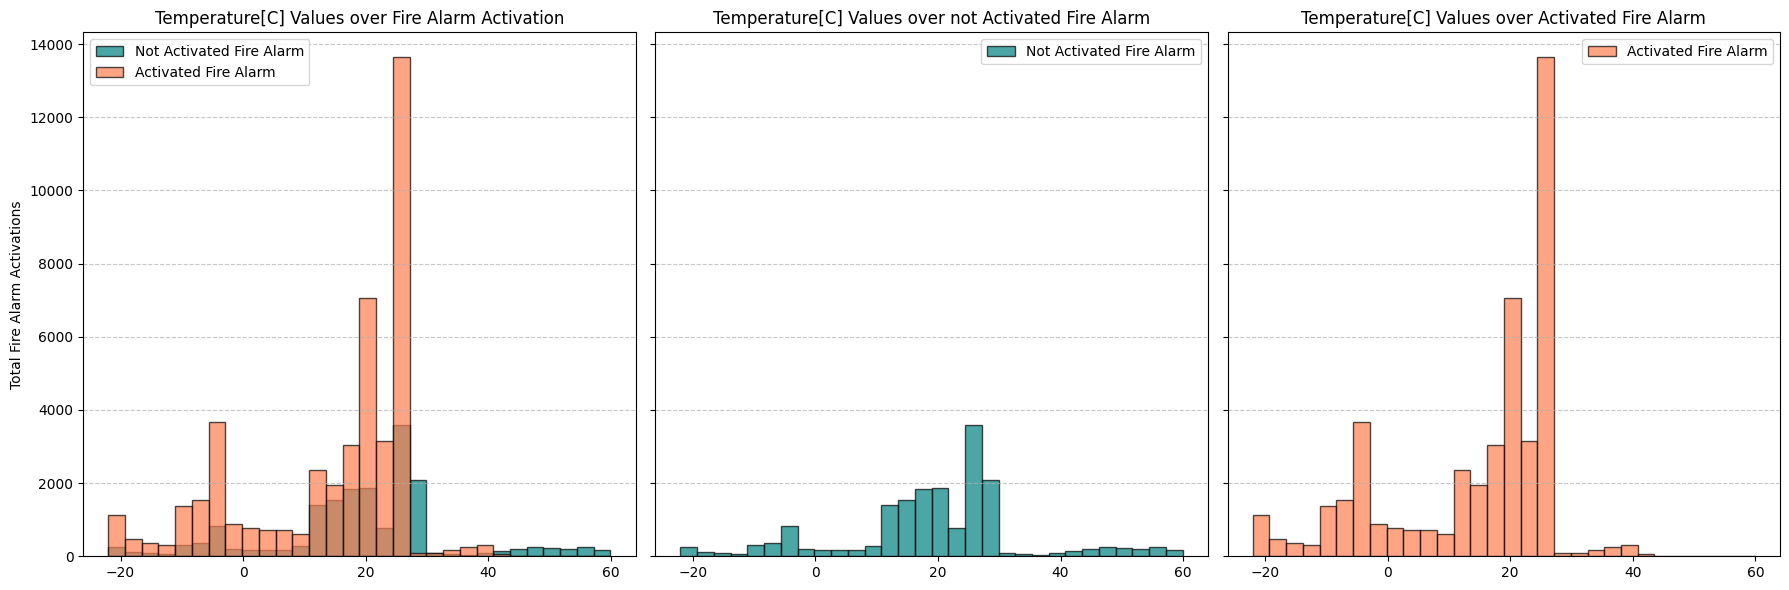

In [66]:
show_fire_alarm_activation_plot(dataset, "Temperature[C]")

### Humidity

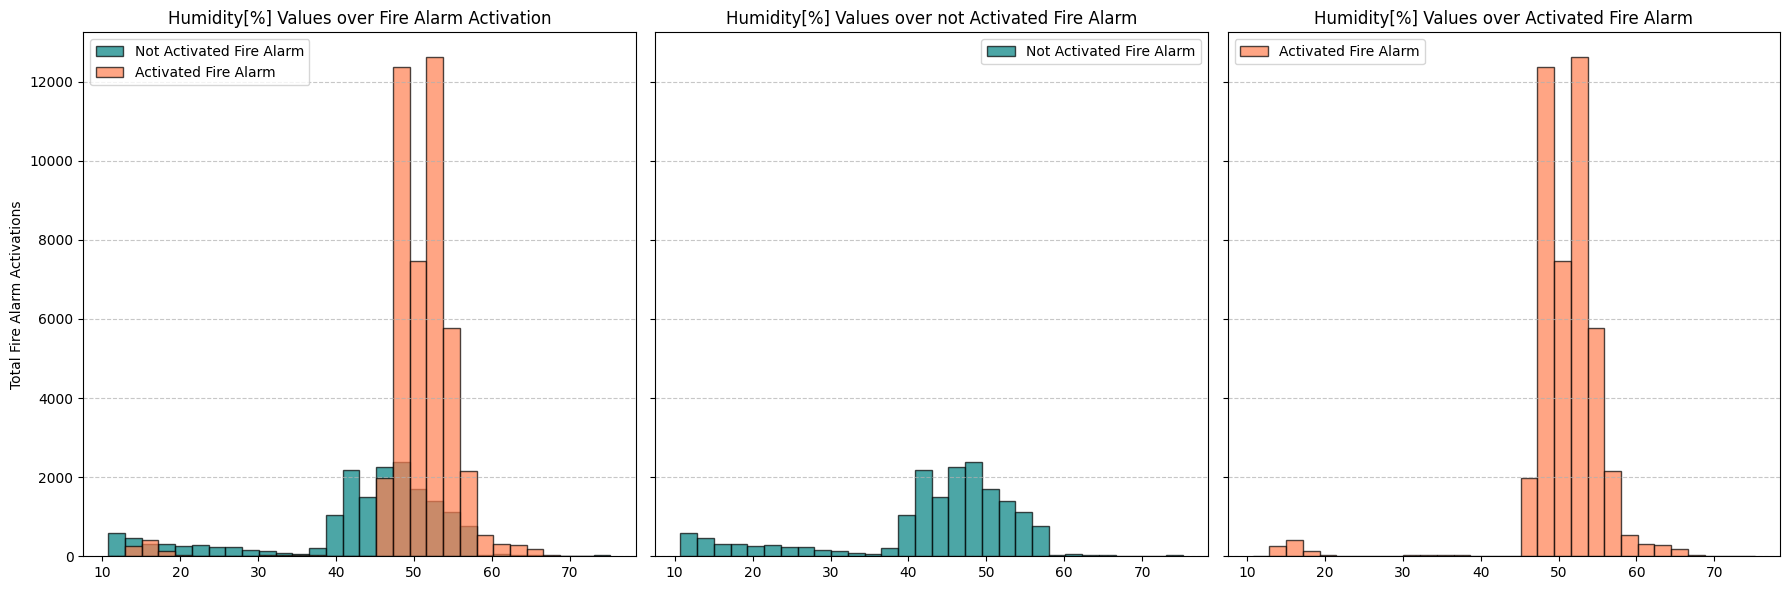

In [67]:
show_fire_alarm_activation_plot(dataset, "Humidity[%]")

### TVOC

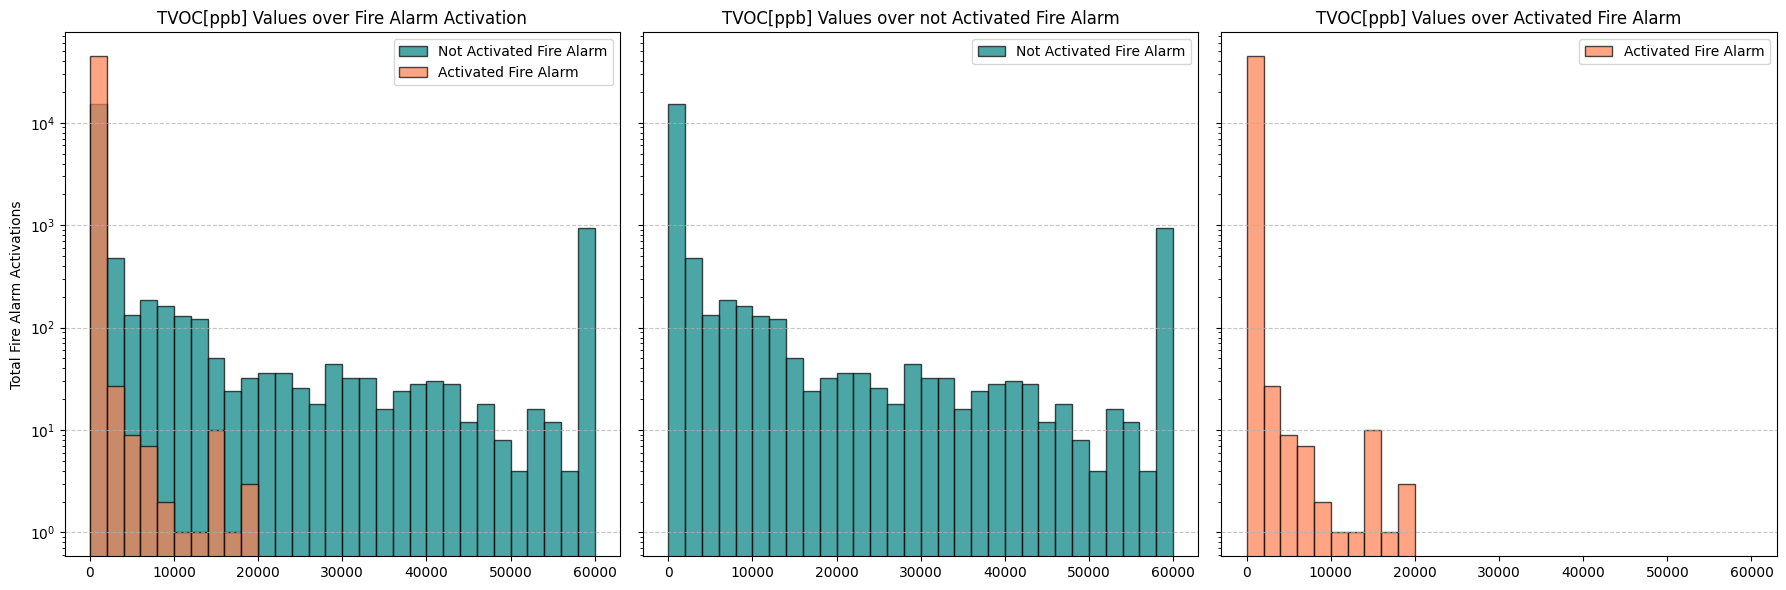

In [68]:
show_fire_alarm_activation_plot(dataset, "TVOC[ppb]", log_scale=True)

### eCO2

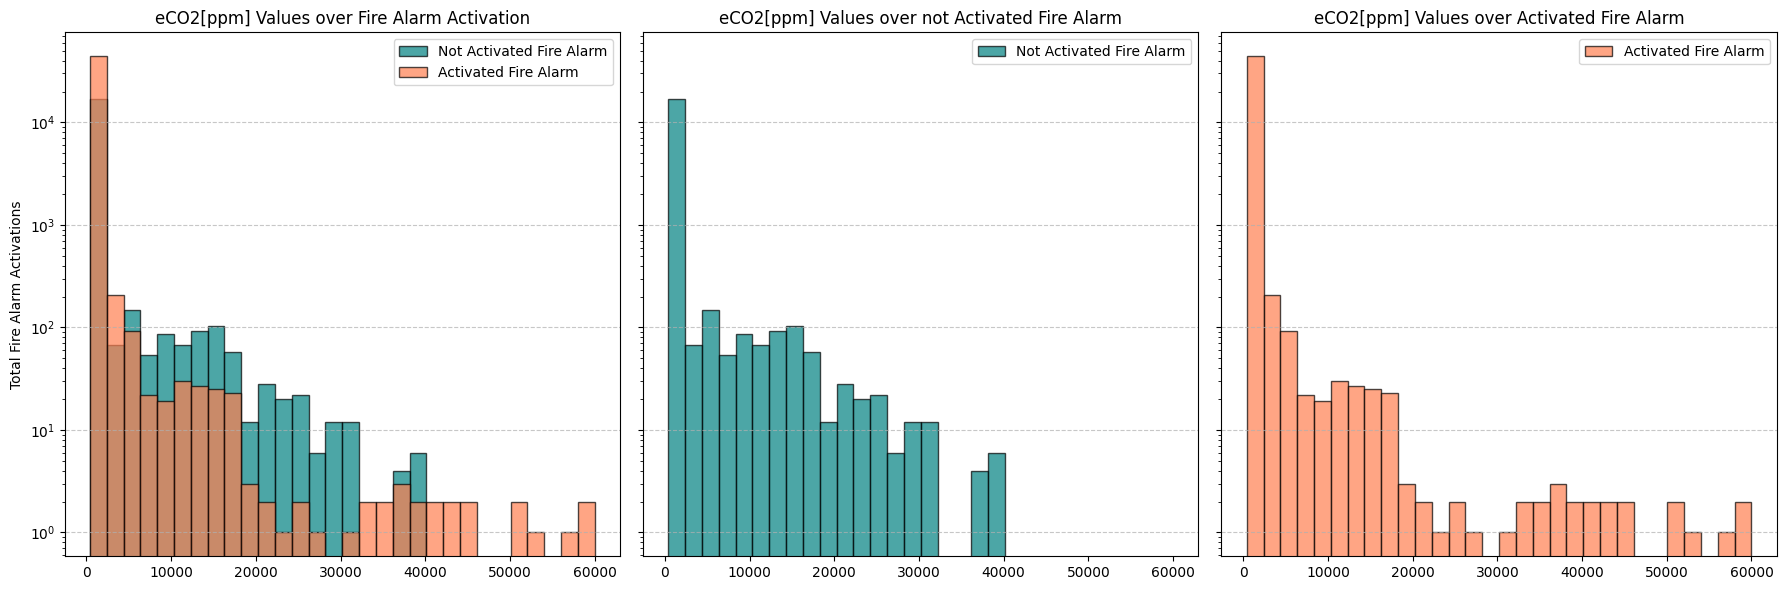

In [69]:
show_fire_alarm_activation_plot(dataset, "eCO2[ppm]", log_scale=True)

### Raw H2

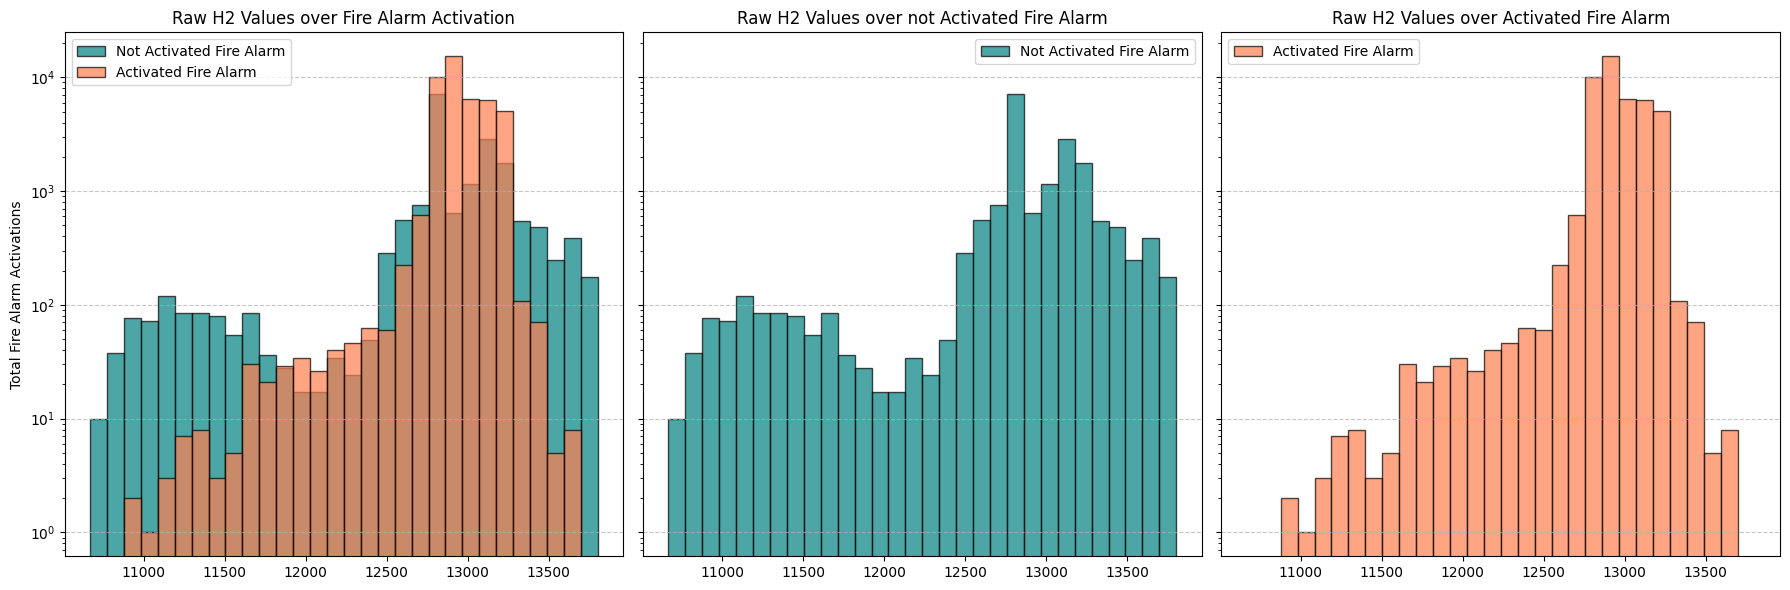

In [70]:
show_fire_alarm_activation_plot(dataset, "Raw H2", log_scale=True)

### Raw Ethanol

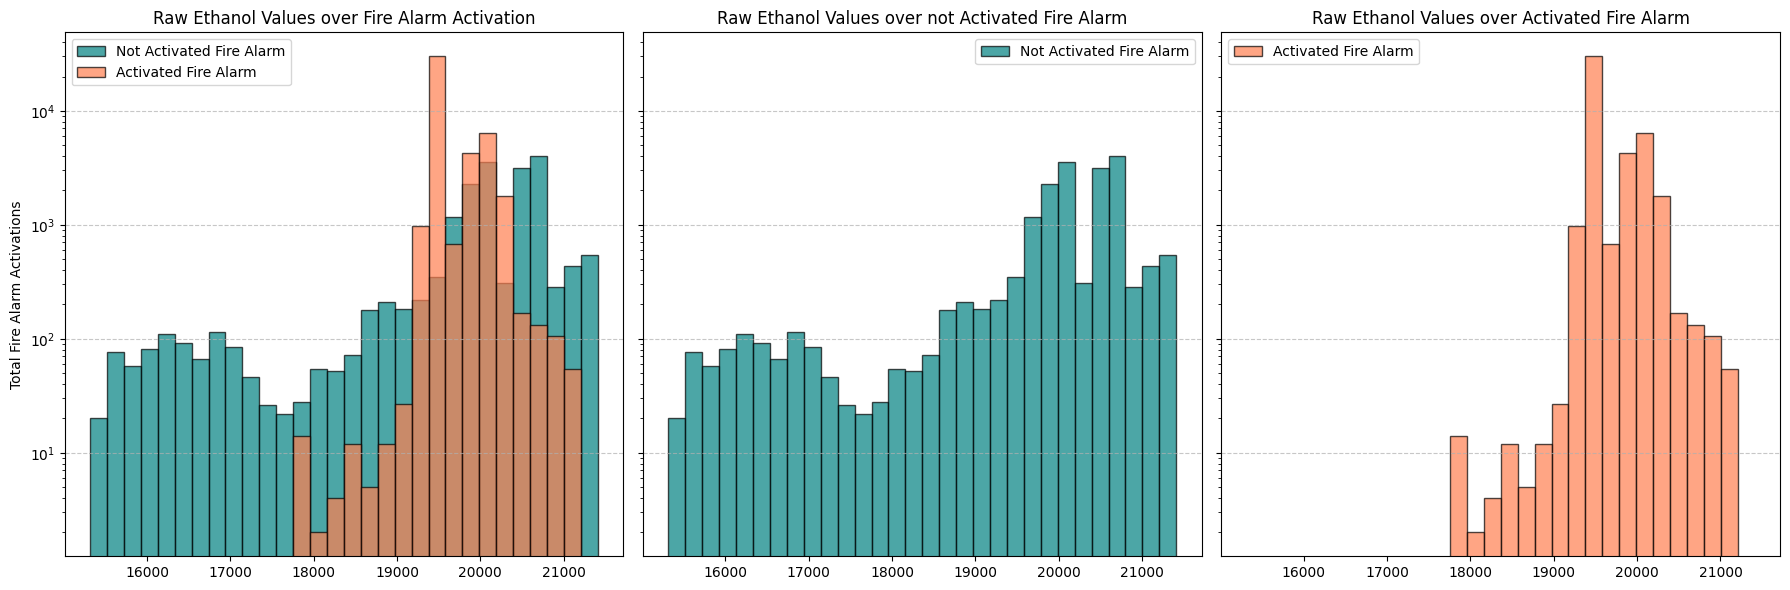

In [71]:
show_fire_alarm_activation_plot(dataset, "Raw Ethanol", log_scale=True)

### Pressure[hPa]

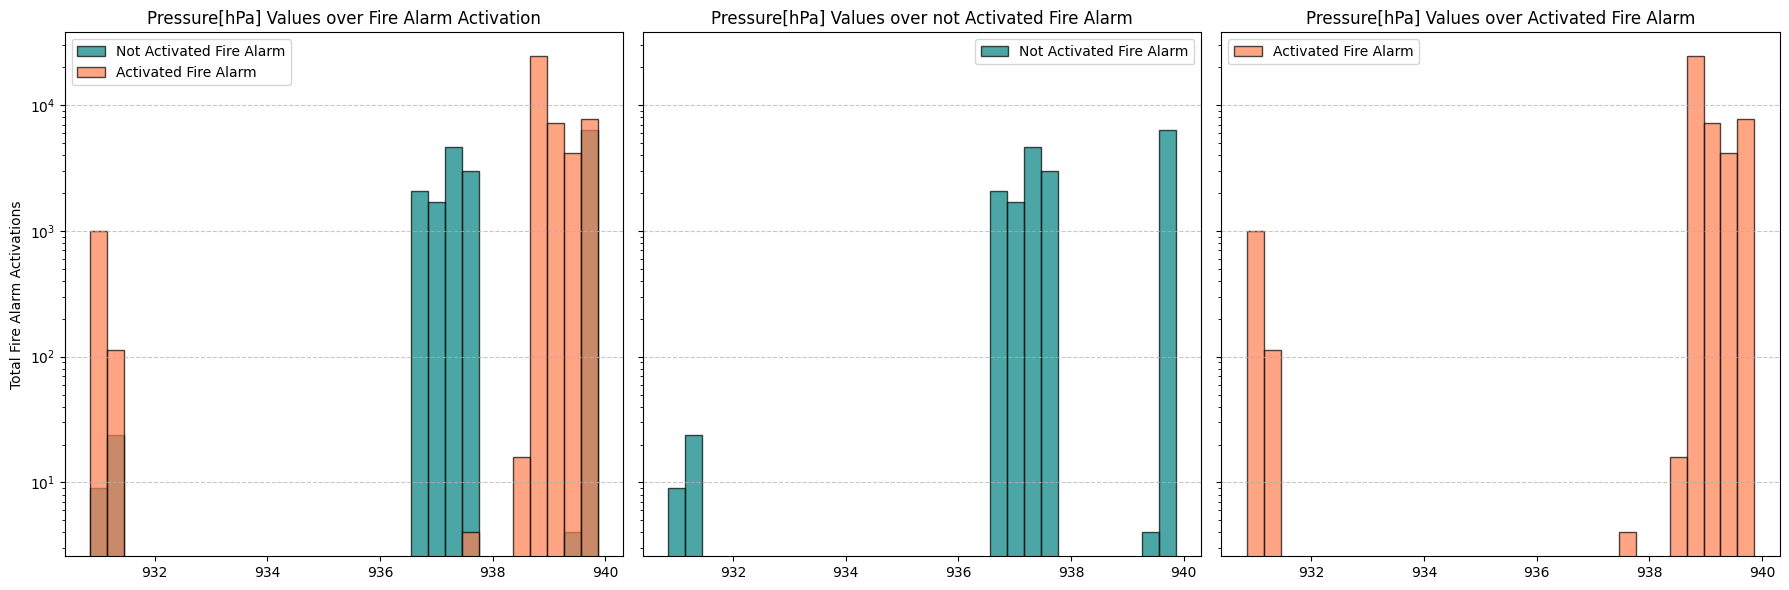

In [72]:
show_fire_alarm_activation_plot(dataset, "Pressure[hPa]", log_scale=True)

### PM1.0

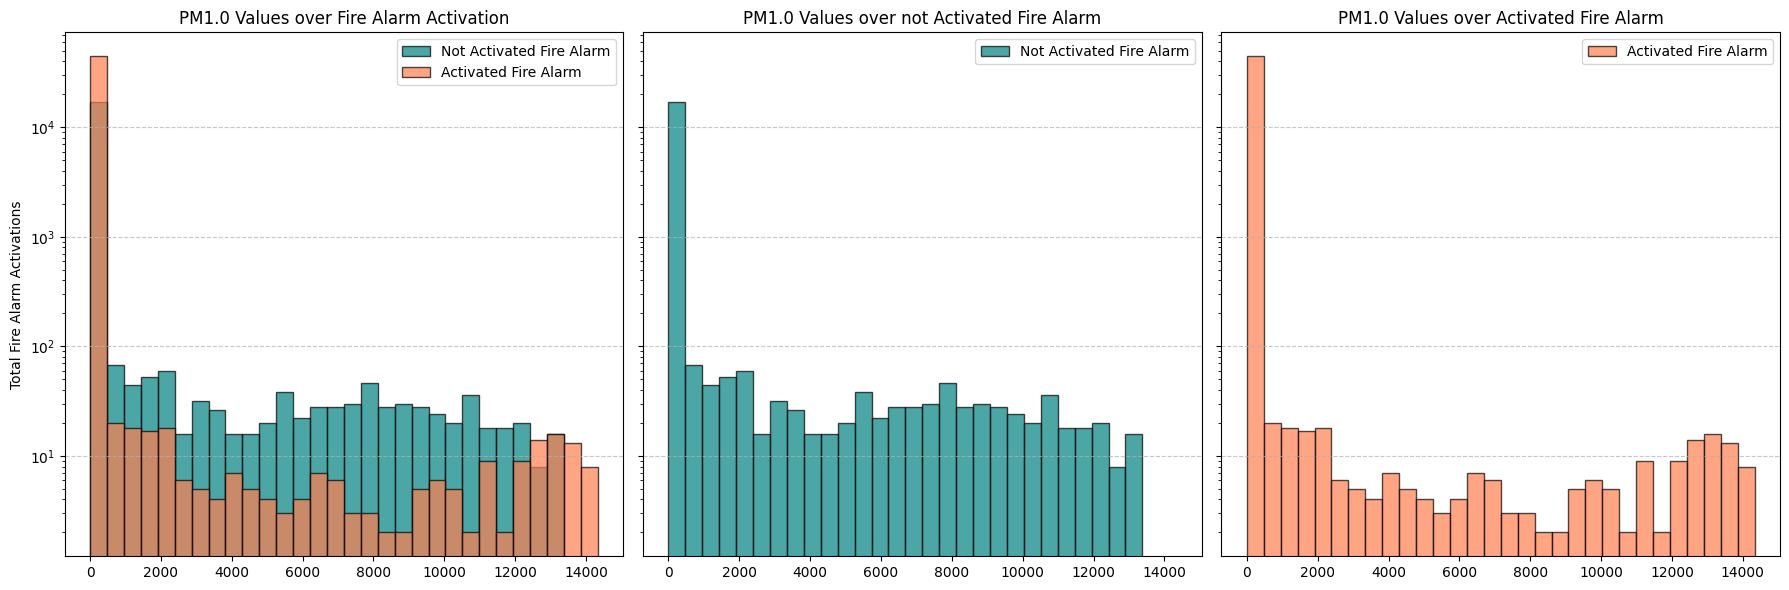

In [73]:
show_fire_alarm_activation_plot(dataset, "PM1.0", log_scale=True)

### PM2.5

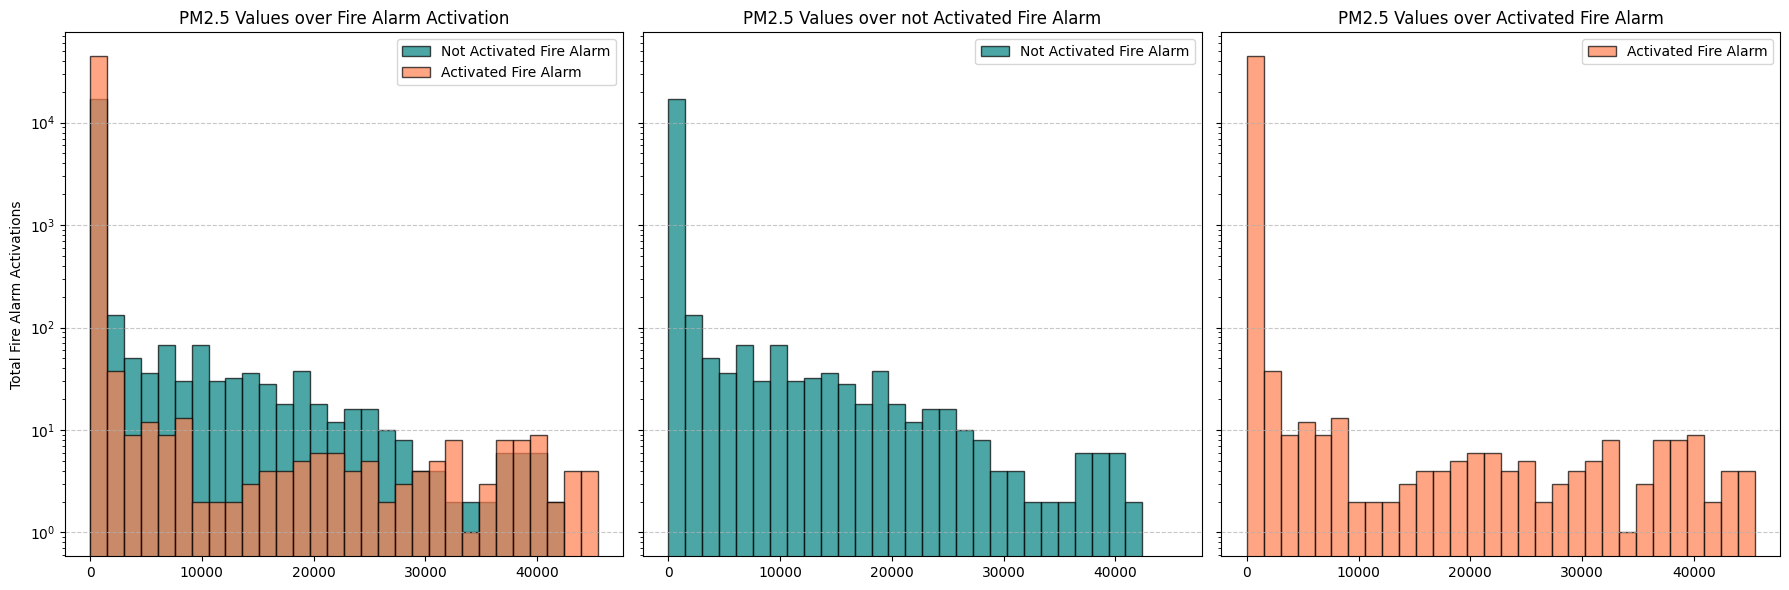

In [74]:
show_fire_alarm_activation_plot(dataset, "PM2.5", log_scale=True)

### NC0.5

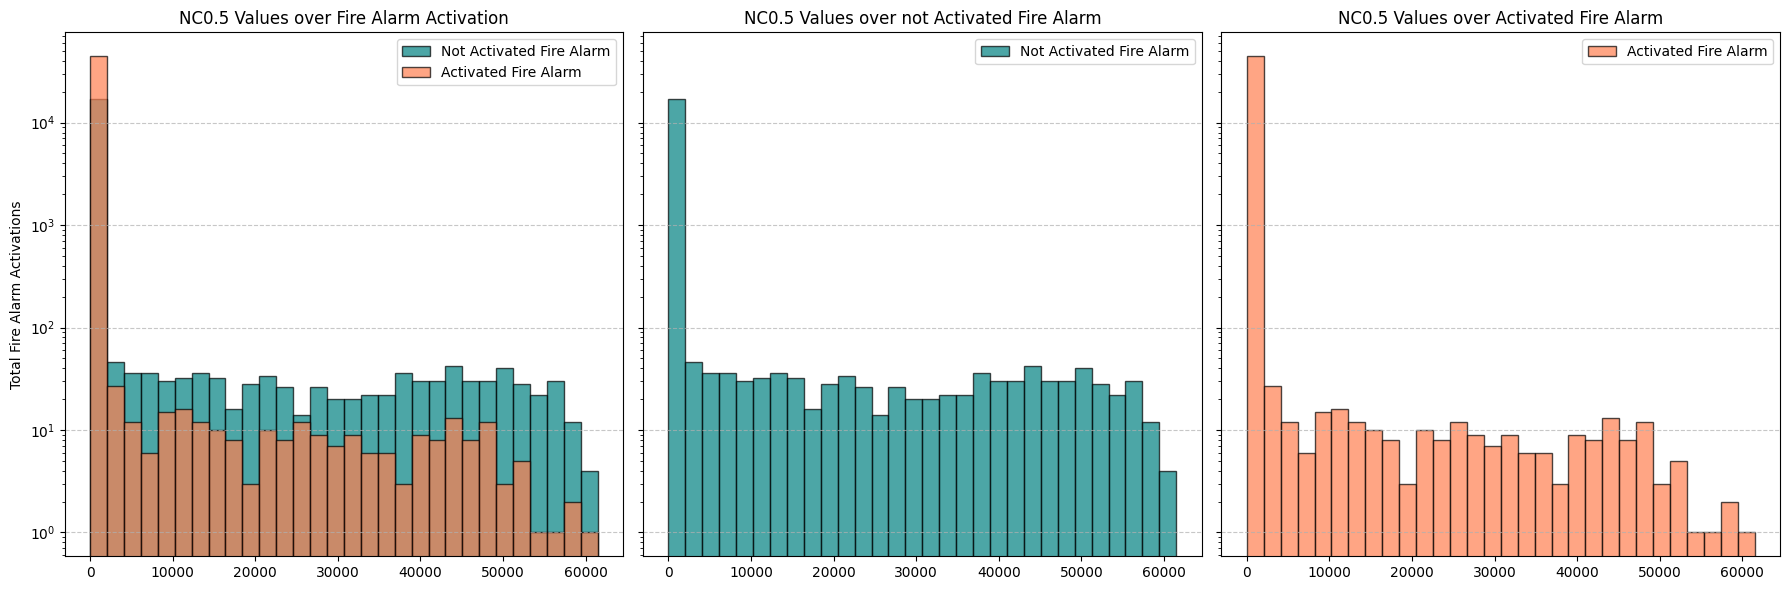

In [75]:
show_fire_alarm_activation_plot(dataset, "NC0.5", log_scale=True)

### NC1.0

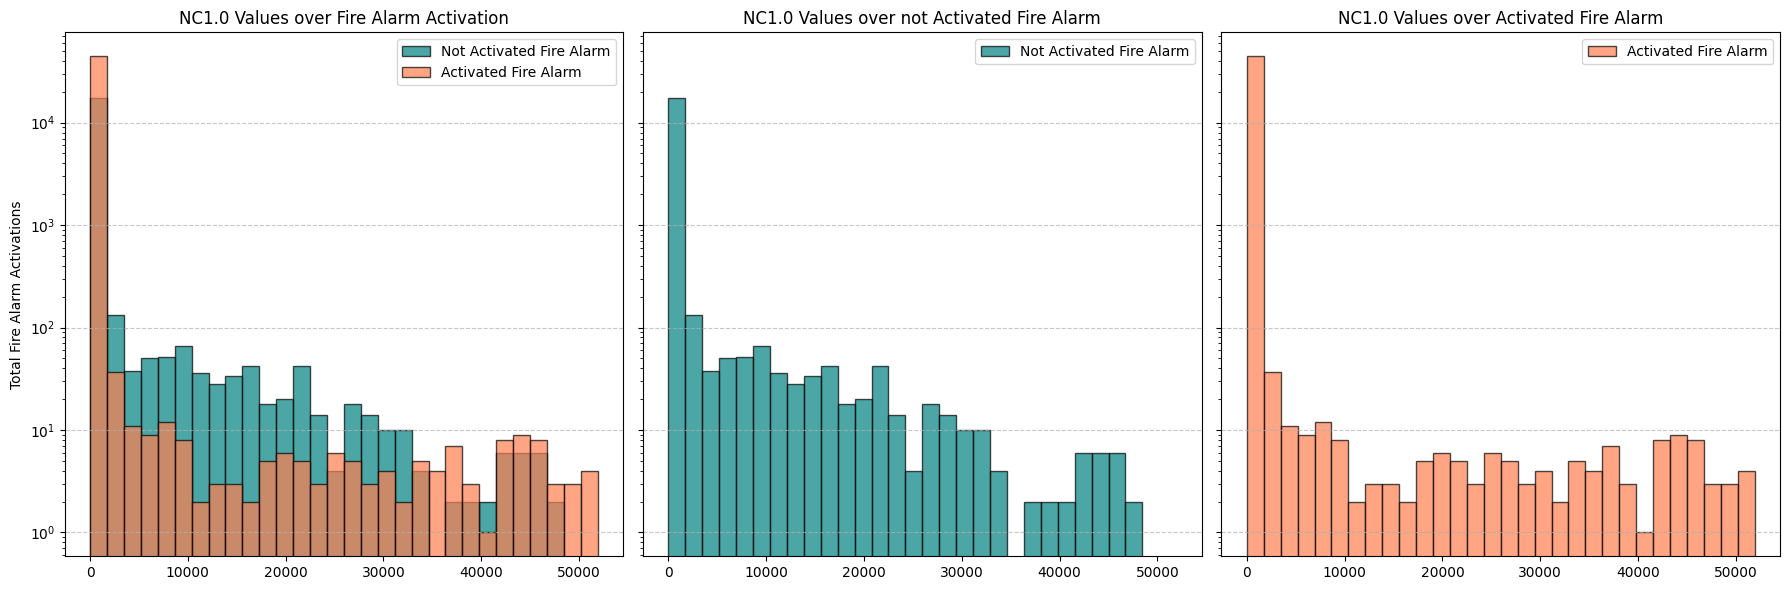

In [76]:
show_fire_alarm_activation_plot(dataset, "NC1.0", log_scale=True)

### NC2.5

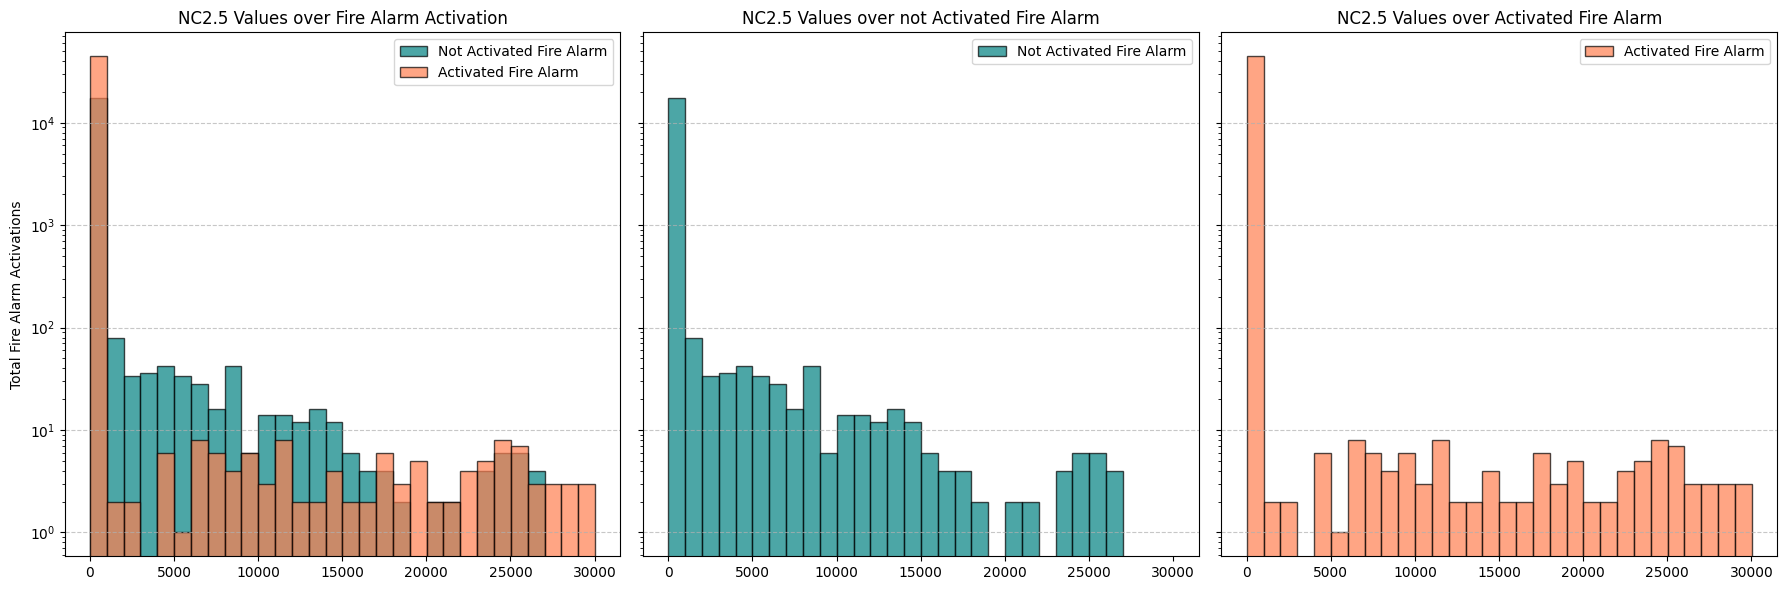

In [77]:
show_fire_alarm_activation_plot(dataset, "NC2.5", log_scale=True)

### Correlation Matrix

In [78]:
correlation = dataset.corr()
correlation

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


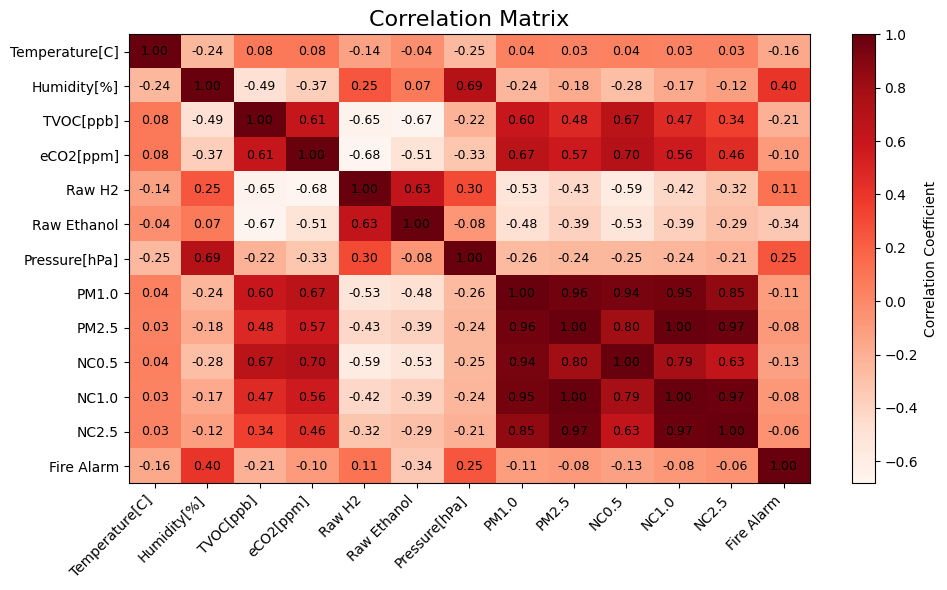

In [79]:
plt.figure(figsize=(10, 6))
plt.imshow(correlation, cmap="Reds", interpolation="none", aspect="auto")
plt.colorbar(label="Correlation Coefficient")

plt.xticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        plt.text(i, j, f"{correlation.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=9)

plt.title("Correlation Matrix", fontsize=16)

plt.tight_layout()
plt.show()

considerando la correlazione alta quando ha un indice maggiore di 0.7, notiamo che tutti i dati di tipo "NC*" e "PM*" sono fortemente correlati tra loro. (correlazione lineare)

## Data Split

Dividiamo il dataset a nostra disposizione come sempre in tre parti, una per il training, una per la validation, una per il testing, dando rispettivamente il 60%, il 20% ed il 20%.

In [80]:
from sklearn.model_selection import train_test_split
random_seed = 42

train_ratio = 0.60
test_ratio = 0.20
validation_ratio = 0.20

x_data = dataset.drop("Fire Alarm", axis=1)
y_data = dataset["Fire Alarm"]

x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=test_ratio, random_state=random_seed)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=validation_ratio/(train_ratio+validation_ratio), random_state=random_seed)

# apply a standard scaler to the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


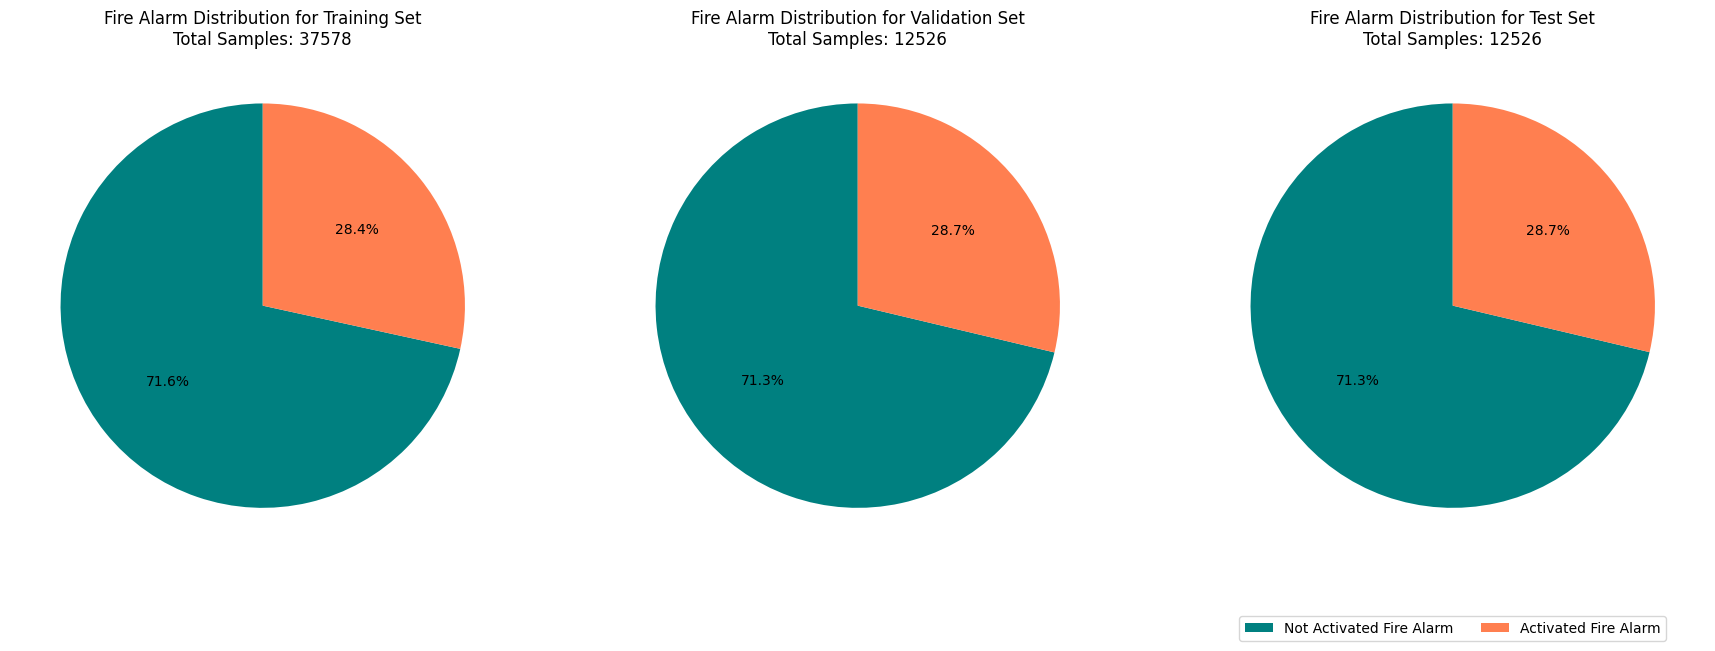

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
counts = y_train.value_counts()
axs[0].pie(counts, autopct='%1.1f%%', startangle=90, colors=["teal", "coral"])
axs[0].set_title(f"Fire Alarm Distribution for Training Set\nTotal Samples: {len(y_train)}")

counts = y_val.value_counts()
axs[1].pie(counts, autopct='%1.1f%%', startangle=90, colors=["teal", "coral"])
axs[1].set_title(f"Fire Alarm Distribution for Validation Set\nTotal Samples: {len(y_val)}")

counts = y_test.value_counts()
axs[2].pie(counts, autopct='%1.1f%%', startangle=90, colors=["teal", "coral"])
axs[2].set_title(f"Fire Alarm Distribution for Test Set\nTotal Samples: {len(y_test)}")

plt.legend(labels=["Not Activated Fire Alarm", "Activated Fire Alarm"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.tight_layout()
plt.show()

# Model creation

testiamo diversi modelli sui dati tenendo conto del tempo e dell'accuratezza di ognuno

In [85]:
#Import dei modelli
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 

In [87]:
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [ ]:
names = []
scores = []
times = []

for model in models:
    names.append(type(model).__name__)
    start = time.time()
    model.fit(x_train, y_train)
    prediction = model.predict(x_val)
    end = time.time()
    accuracy = sk.metrics.accuracy_score(y_val, prediction)
    scores.append(accuracy)
    times.append(end - start)

results = pd.DataFrame({"Model": names, "Accuracy": scores, "Time": times})
results.sort_values("Accuracy", ascending=False, inplace=True)
results


/home/alessandro/Projects/machine_learning/.venv/lib64/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Time
3,RandomForestClassifier,1.000000,3.140011
6,BaggingClassifier,1.000000,0.828752
4,GradientBoostingClassifier,0.999760,7.980337
10,ExtraTreeClassifier,0.999601,0.010449
5,AdaBoostClassifier,0.999202,1.857686
0,KNeighborsClassifier,0.998323,1.240712
7,SVC,0.966629,12.183663
1,SGDClassifier,0.913859,0.049749
2,LogisticRegression,0.901645,0.081022
8,GaussianNB,0.765767,0.012454


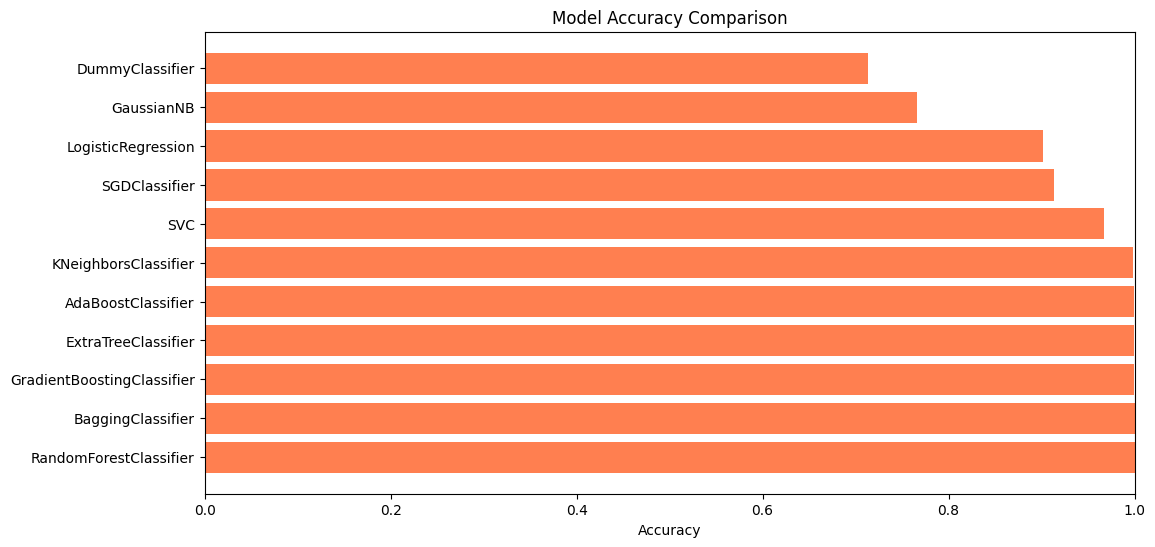

In [89]:
fig = plt.figure(figsize=(12, 6))
plt.barh(results["Model"], results["Accuracy"], color="coral")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()


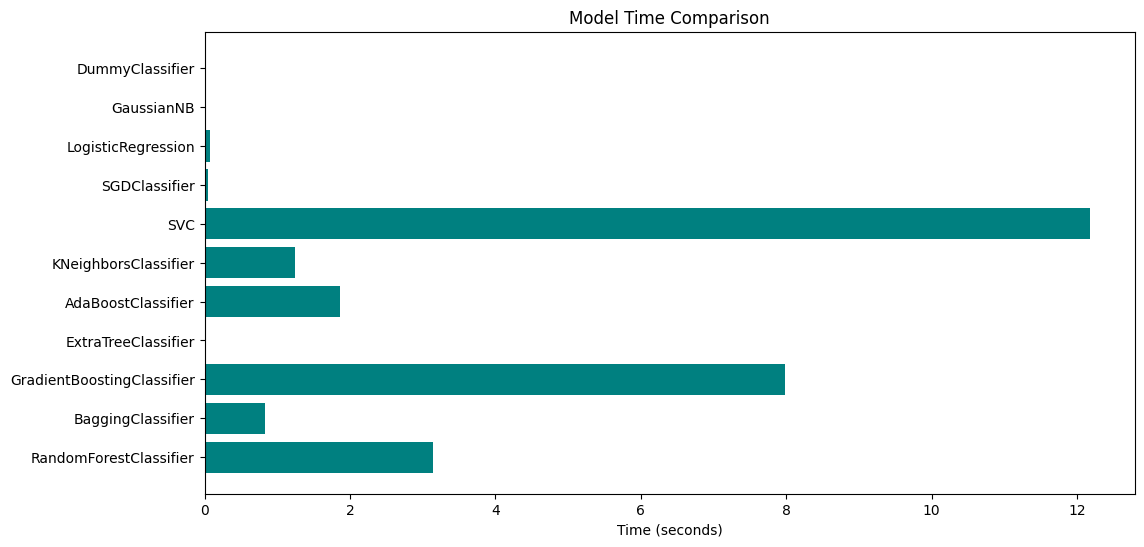

In [90]:
# time comparison
fig = plt.figure(figsize=(12, 6))
plt.barh(results["Model"], results["Time"], color="teal")
plt.xlabel("Time (seconds)")
plt.title("Model Time Comparison")

plt.show()